In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_csv("ecommerce_sales.csv")
df.head(20)

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,order_date,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender
0,O100000,C17270,P234890,Home,164.08,0.15,1,Credit Card,2023-12-23,4,West,No,139.47,7.88,31.17,60,Female
1,O100001,C17603,P228204,Grocery,24.73,0.00,1,Credit Card,2025-04-03,6,South,No,24.73,4.60,-2.62,37,Male
2,O100002,C10860,P213892,Electronics,175.58,0.05,1,Credit Card,2024-10-08,4,North,No,166.80,6.58,13.44,34,Male
3,O100003,C15390,P208689,Electronics,63.67,0.00,1,UPI,2024-09-14,6,South,No,63.67,5.50,2.14,21,Female
4,O100004,C15226,P228063,Home,16.33,0.15,1,COD,2024-12-21,6,East,No,13.88,2.74,1.15,39,Male
5,O100005,C15191,P214062,Beauty,53.91,0.10,2,Credit Card,2024-04-14,5,South,No,97.04,6.32,37.35,35,Female
6,O100006,C13772,P201363,Electronics,266.50,0.00,1,PayPal,2025-05-20,5,East,No,266.50,9.10,22.88,49,Male
7,O100007,C13092,P216691,Beauty,9.98,0.00,1,Credit Card,2023-09-14,4,West,No,9.98,4.51,-0.02,66,Other
8,O100008,C15734,P202751,Fashion,6.61,0.05,1,Debit Card,2023-10-23,6,West,No,6.28,3.43,-1.23,37,Female
9,O100009,C16265,P207782,Grocery,10.91,0.00,1,Credit Card,2023-10-31,6,South,No,10.91,2.76,-1.89,56,Male


In [4]:
df.dtypes

order_id               object
customer_id            object
product_id             object
category               object
price                 float64
discount              float64
quantity                int64
payment_method         object
order_date             object
delivery_time_days      int64
region                 object
returned               object
total_amount          float64
shipping_cost         float64
profit_margin         float64
customer_age            int64
customer_gender        object
dtype: object

In [5]:
df['order_date'] = pd.to_datetime(df['order_date'])
df.dtypes

order_id                      object
customer_id                   object
product_id                    object
category                      object
price                        float64
discount                     float64
quantity                       int64
payment_method                object
order_date            datetime64[ns]
delivery_time_days             int64
region                        object
returned                      object
total_amount                 float64
shipping_cost                float64
profit_margin                float64
customer_age                   int64
customer_gender               object
dtype: object

In [6]:
df['order_month'] = df['order_date'].dt.month_name()
df['order_year'] = df['order_date'].dt.year
df.head(10)

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,order_date,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender,order_month,order_year
0,O100000,C17270,P234890,Home,164.08,0.15,1,Credit Card,2023-12-23,4,West,No,139.47,7.88,31.17,60,Female,December,2023
1,O100001,C17603,P228204,Grocery,24.73,0.00,1,Credit Card,2025-04-03,6,South,No,24.73,4.60,-2.62,37,Male,April,2025
2,O100002,C10860,P213892,Electronics,175.58,0.05,1,Credit Card,2024-10-08,4,North,No,166.80,6.58,13.44,34,Male,October,2024
3,O100003,C15390,P208689,Electronics,63.67,0.00,1,UPI,2024-09-14,6,South,No,63.67,5.50,2.14,21,Female,September,2024
4,O100004,C15226,P228063,Home,16.33,0.15,1,COD,2024-12-21,6,East,No,13.88,2.74,1.15,39,Male,December,2024
5,O100005,C15191,P214062,Beauty,53.91,0.10,2,Credit Card,2024-04-14,5,South,No,97.04,6.32,37.35,35,Female,April,2024
6,O100006,C13772,P201363,Electronics,266.50,0.00,1,PayPal,2025-05-20,5,East,No,266.50,9.10,22.88,49,Male,May,2025
7,O100007,C13092,P216691,Beauty,9.98,0.00,1,Credit Card,2023-09-14,4,West,No,9.98,4.51,-0.02,66,Other,September,2023
8,O100008,C15734,P202751,Fashion,6.61,0.05,1,Debit Card,2023-10-23,6,West,No,6.28,3.43,-1.23,37,Female,October,2023
9,O100009,C16265,P207782,Grocery,10.91,0.00,1,Credit Card,2023-10-31,6,South,No,10.91,2.76,-1.89,56,Male,October,2023


In [7]:
df.info()
df.describe(include = 'all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34500 entries, 0 to 34499
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            34500 non-null  object        
 1   customer_id         34500 non-null  object        
 2   product_id          34500 non-null  object        
 3   category            34500 non-null  object        
 4   price               34500 non-null  float64       
 5   discount            34500 non-null  float64       
 6   quantity            34500 non-null  int64         
 7   payment_method      34500 non-null  object        
 8   order_date          34500 non-null  datetime64[ns]
 9   delivery_time_days  34500 non-null  int64         
 10  region              34500 non-null  object        
 11  returned            34500 non-null  object        
 12  total_amount        34500 non-null  float64       
 13  shipping_cost       34500 non-null  float64   

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,order_date,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender,order_month,order_year
count,34500,34500,34500,34500,34500.000000,34500.000000,34500.000000,34500,34500,34500.000000,34500,34500,34500.000000,34500.000000,34500.000000,34500.000000,34500,34500,34500.000000
unique,34500,7903,24912,7,NaN,NaN,NaN,6,NaN,NaN,5,2,NaN,NaN,NaN,NaN,3,12,NaN
top,O100000,C11573,P200645,Fashion,NaN,NaN,NaN,Credit Card,NaN,NaN,South,No,NaN,NaN,NaN,NaN,Female,July,NaN
freq,1,13,7,6254,NaN,NaN,NaN,12170,NaN,NaN,7584,32597,NaN,NaN,NaN,NaN,16818,2972,NaN
mean,NaN,NaN,NaN,NaN,119.391632,0.049291,1.490725,NaN,2024-09-13 13:39:17.843478272,4.814203,NaN,NaN,170.008494,6.152120,28.116505,43.474377,NaN,NaN,2024.200319
min,NaN,NaN,NaN,NaN,1.010000,0.000000,1.000000,NaN,2023-09-12 00:00:00,3.000000,NaN,NaN,0.820000,0.000000,-6.200000,18.000000,NaN,NaN,2023.000000
25%,NaN,NaN,NaN,NaN,16.690000,0.000000,1.000000,NaN,2024-03-14 00:00:00,4.000000,NaN,NaN,19.710000,4.420000,1.500000,31.000000,NaN,NaN,2024.000000
50%,NaN,NaN,NaN,NaN,45.660000,0.000000,1.000000,NaN,2024-09-16 00:00:00,5.000000,NaN,NaN,56.820000,6.090000,10.550000,43.000000,NaN,NaN,2024.000000
75%,NaN,NaN,NaN,NaN,130.950000,0.100000,2.000000,NaN,2025-03-17 00:00:00,6.000000,NaN,NaN,168.530000,7.830000,33.132500,56.000000,NaN,NaN,2025.000000
max,NaN,NaN,NaN,NaN,2930.470000,0.300000,5.000000,NaN,2025-09-11 00:00:00,13.000000,NaN,NaN,12931.800000,15.650000,1536.170000,69.000000,NaN,NaN,2025.000000


In [8]:
df.isnull().sum()

order_id              0
customer_id           0
product_id            0
category              0
price                 0
discount              0
quantity              0
payment_method        0
order_date            0
delivery_time_days    0
region                0
returned              0
total_amount          0
shipping_cost         0
profit_margin         0
customer_age          0
customer_gender       0
order_month           0
order_year            0
dtype: int64

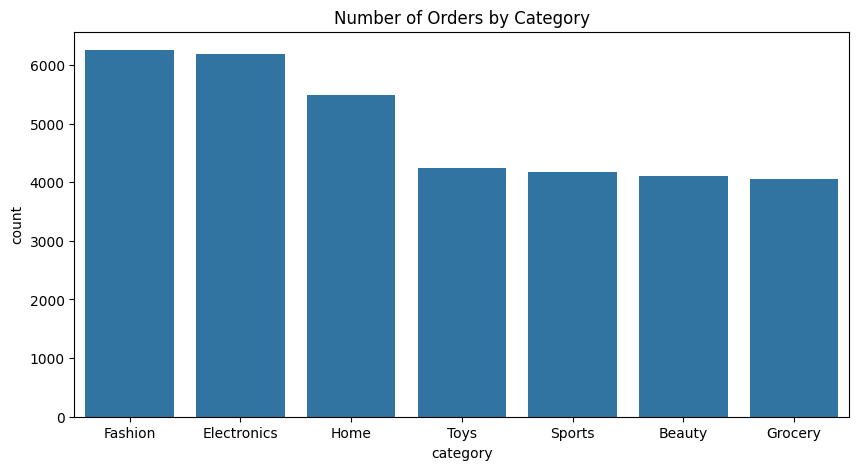

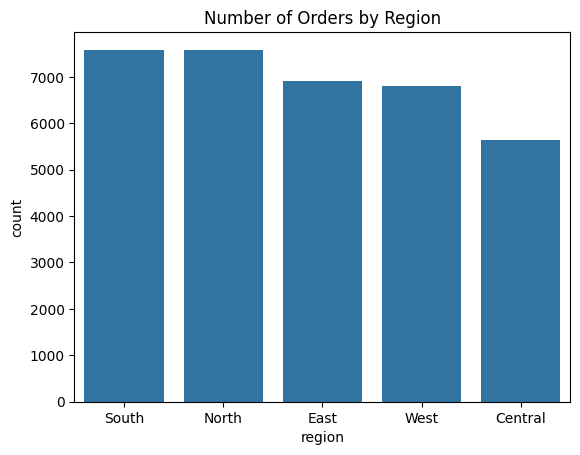

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(data = df, x = 'category', order = df['category'].value_counts().index)
plt.title('Number of Orders by Category')
plt.show()

sns.countplot(data = df, x = 'region', order = df['region'].value_counts().index)
plt.title('Number of Orders by Region')
plt.show()

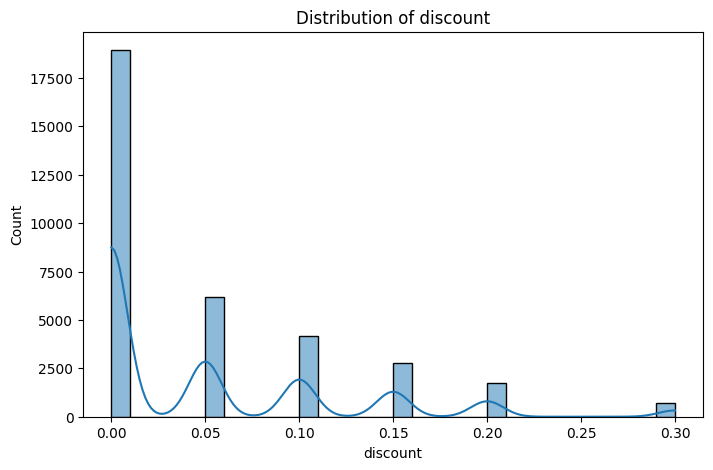

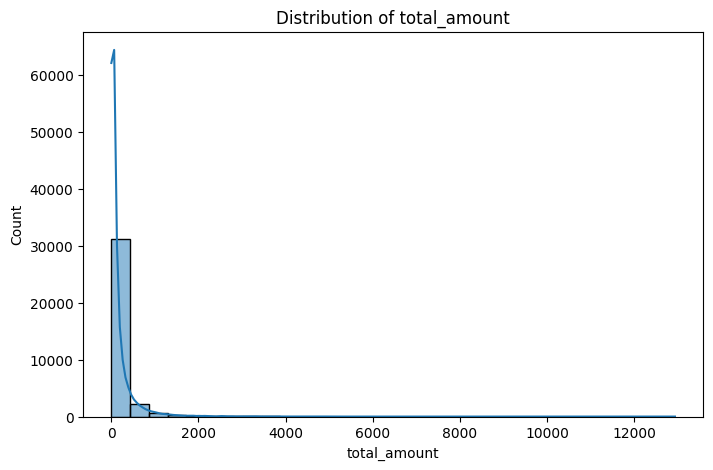

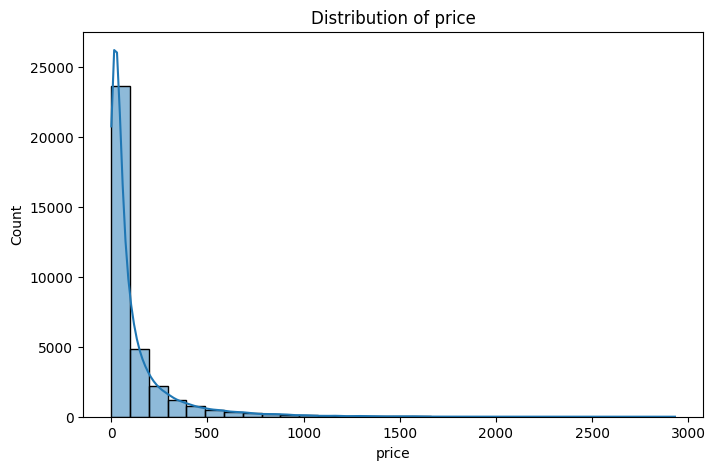

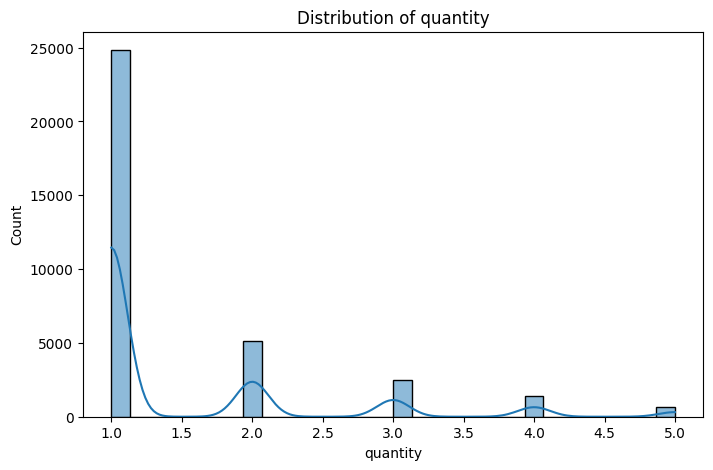

In [42]:
new_cols = ['discount', 'total_amount', 'price', 'quantity']

for cols in new_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(df[cols], bins = 30, kde = True)
    plt.title(f"Distribution of {cols}")
    plt.show()

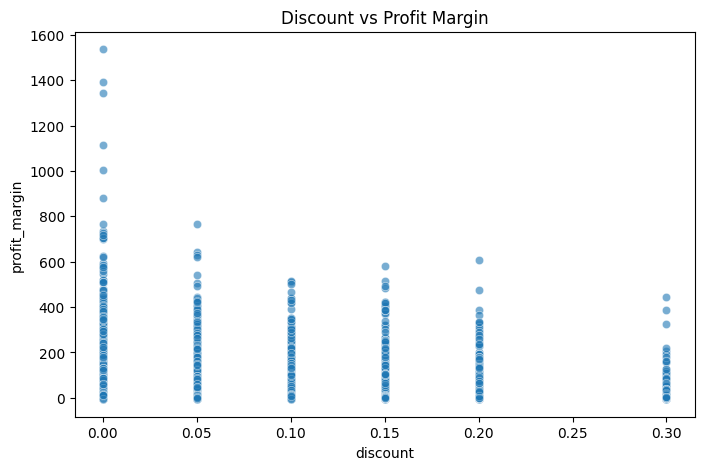

In [46]:
plt.figure(figsize = (8, 5))
sns.scatterplot(data = df, x = 'discount', y = 'profit_margin', alpha = 0.6)
plt.title('Discount vs Profit Margin')
plt.show()

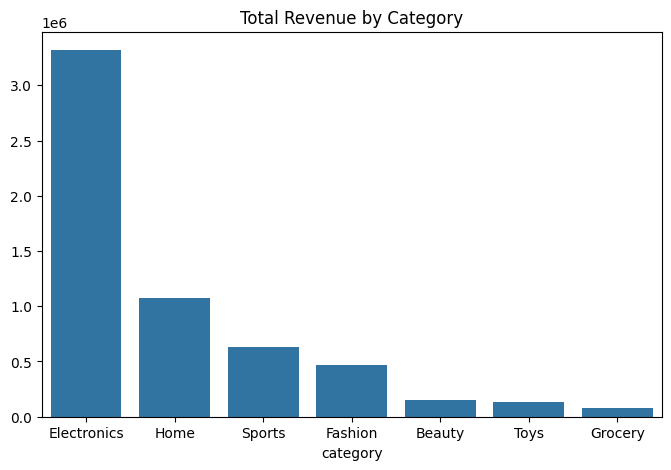

In [48]:
category_revenue = df.groupby('category')['total_amount'].sum().sort_values(ascending = False)
plt.figure(figsize = (8, 5))
sns.barplot(x = category_revenue.index, y = category_revenue.values)
plt.title('Total Revenue by Category')
plt.show()

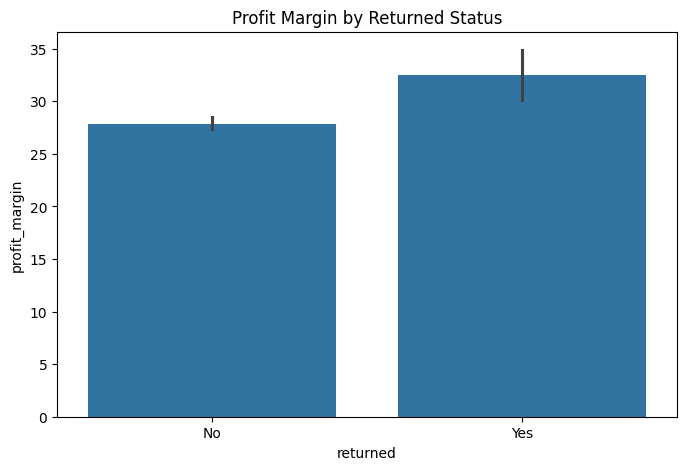

In [70]:
plt.figure(figsize=(8, 5))
sns.barplot(data = df, x = 'returned', y = 'profit_margin')
plt.title('Profit Margin by Returned Status')
plt.show()